We have three vars

lat = [57.5, 60, 62.5, 65, 67.5]

date = [21 Jun, 21 July, 21 Aug]

daylight and with twilight

In [30]:
import ephem
import matplotlib.pyplot as plt
from copy import deepcopy 
import datetime as dt
import pandas as pd

In [63]:
lats = [-57.5, -60, -62.5, -65] #, -67.5]

In [58]:
lats

[-57.5, -60, -62.5, -65, -67.5]

In [40]:
nuyina = ephem.Observer()

nuyina.lon = "110"
nuyina.elev = 0 #sea level

In [135]:
oneDay = dt.timedelta(days=1)

startDay = dt.date(2024,6,1)

days = [startDay+oneDay*i for i in range(0,92)]

In [136]:
daylight_df = pd.DataFrame(columns=lats, index=days)
twilight_df = pd.DataFrame(columns=lats, index=days)

In [137]:
for iLat in lats:
    
    nuyina.horizon='0'
    
    nuyina.lat = str(iLat)

    daylight = list()
    for iDay in days:
        nuyina.date = str(iDay)+' 05:00:00'
        daylight.append((nuyina.next_setting(ephem.Sun()).datetime() - nuyina.previous_rising(ephem.Sun()).datetime()).seconds/3600)

    daylight_df[iLat] = daylight

    nuyina.horizon='-6'

    twilight = list()
    for iDay in days:
        nuyina.date = str(iDay)+' 05:00:00'
        twilight.append((nuyina.next_setting(ephem.Sun()).datetime() - nuyina.previous_rising(ephem.Sun()).datetime()).seconds/3600)

    twilight_df[iLat] = twilight

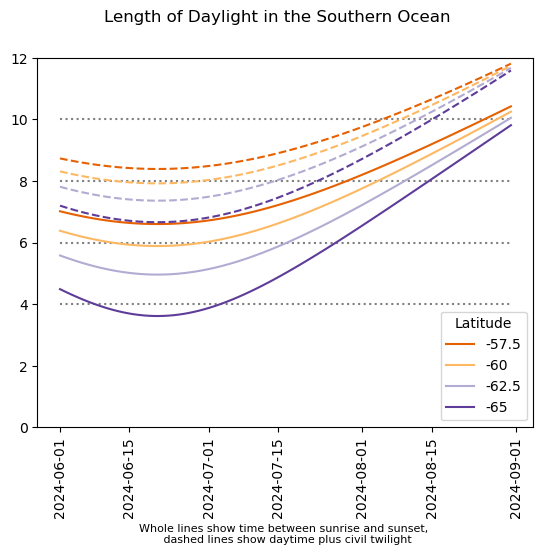

In [141]:
fig = plt.figure()
ax = plt.subplot() 
colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']

daylight_df.plot(ax=ax, color = colors)
twilight_df.plot(ax=ax, color = colors, linestyle='dashed')

plt.ylim([0,12])
plt.hlines([4,6,8,10], days[0], days[-1], linestyle='dotted', color='gray')

plt.legend(lats, loc='lower right', title='Latitude') # *[str(i)+' w/ Twilight' for i in lats]], title= ')

plt.suptitle("Length of Daylight in the Southern Ocean")
plt.xlabel('Whole lines show time between sunrise and sunset, \n dashed lines show daytime plus civil twilight', fontdict={'fontsize':8})

ax.tick_params(axis='x', rotation=90)